## Nama : Muhammad Dean Fahreza
## NPM : 50420812
## Kelas : 2IA09

In [1]:
# mengimport packages
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data train dan test ke dalam pandas dataframe
# dataset : https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv
concrete = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/new_concreate.csv")

In [3]:
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data train dengan fungsi .shape
concrete.shape

(1030, 9)

In [4]:
# menampilkan 10 data teratas
concrete.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,NaN,NaN,192.0,NaN,889.8,945.0,90,21.86
6,166.8,250.2,NaN,203.5,NaN,975.6,692.6,7,15.75
7,251.4,NaN,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,NaN,NaN,192.0,NaN,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [5]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,559.000000,464.000000,1030.000000,651.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,136.158676,120.288793,181.567282,9.816897,972.918932,773.580485,45.662136,35.817961
std,104.506364,72.351823,33.675470,21.354219,4.580328,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,95.000000,97.850000,164.900000,6.950000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,189.000000,141.000000,192.000000,11.600000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
#cek nilai yang hilang / missing values di dalam data train
concrete.isnull().sum().sort_values(ascending=False)

ash             566
slag            471
superplastic    379
cement            0
water             0
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

# Tugas

### 1. Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset concrete. (Ubah data bernilai NaN menjadi 0)

In [7]:
concrete = concrete.fillna(0)
print(concrete.isna().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of       cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
0      False  False  False  False         False      False    False  False   
1      False  False  False  False         False      False    False  False   
2      False  False  False  False         False      False    False  False   
3      False  False  False  False         False      False    False  False   
4      False  False  False  False         False      False    False  False   
...      ...    ...    ...    ...           ...        ...      ...    ...   
1025   False  False  False  False         False      False    False  False   
1026   False  False  False  False         False      False    False  False   
1027   False  False  False  False         False      False    False  False   
1028   False  False  False  False         False      False    False  False   
1029   False  False  False  False         False      False    False  False   

 

In [8]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### 2. Transformasikan data pada kolom strength menjadi kolom baru bernama 'Category', dengan ketentuan :
   1. jika nilai >= 65 = 'Hard'
   2. jika nilai >= 40 = 'Medium'
   3. Jika nilai < 40 = 'Light'

In [9]:
def get_category(x):
  if x >= 65:
    return 'Hard'
  elif x >= 40:
    return 'Medium'
  return 'Light'

In [10]:
concrete['category'] = concrete['strength'].apply(get_category)
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,category
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,Light
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,Light
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,Light
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,Medium
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,Light


### 3. Lakukan analisis histogram untuk pengaruh kolom age terhadap kolom strength, apakah yang dapat Anda simpulkan ?

Text(0.5, 1.0, 'Histogram of Strength')

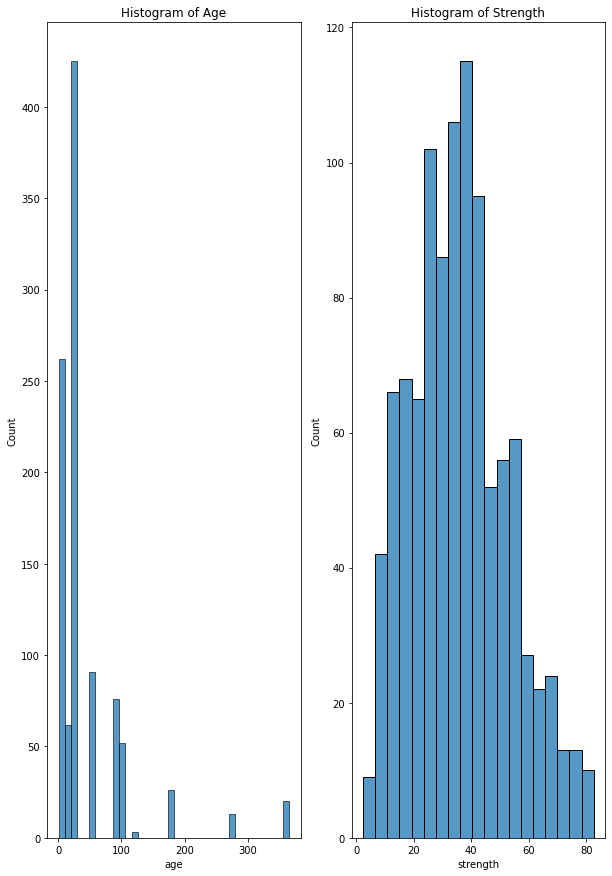

In [11]:
fig, axes = plt.subplots(1,2, figsize=(10,15))

sns.histplot(concrete['age'], ax=axes[0]).set_title('Histogram of Age')
sns.histplot(concrete['strength'], ax=axes[1]).set_title('Histogram of Strength')

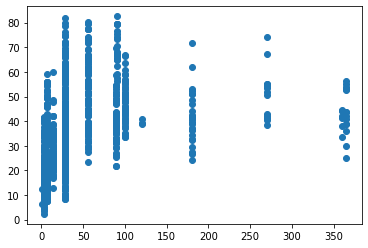

In [12]:
plt.scatter(concrete['age'], concrete['strength'])

### 4. Cari tahu komposisi concrete yang memiliki kekuatan tertinggi dan terendah

In [13]:
print('Komposisi Terkuat')
concrete[concrete['strength']==concrete['strength'].max()]

Komposisi Terkuat


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,category
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.6,Hard


In [14]:
print('Komposisi Terlemah')
concrete[concrete['strength']==concrete['strength'].min()]

Komposisi Terlemah


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,category
230,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33,Light


### 5. Berikan kesimpulan akhir anda terhadap pengaruh komposisi concrete berdasarkan dataset yang digunakan

<AxesSubplot:>

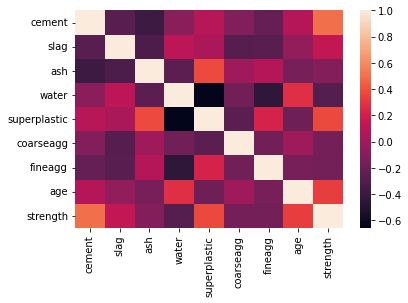

In [15]:
sns.heatmap(concrete.corr())

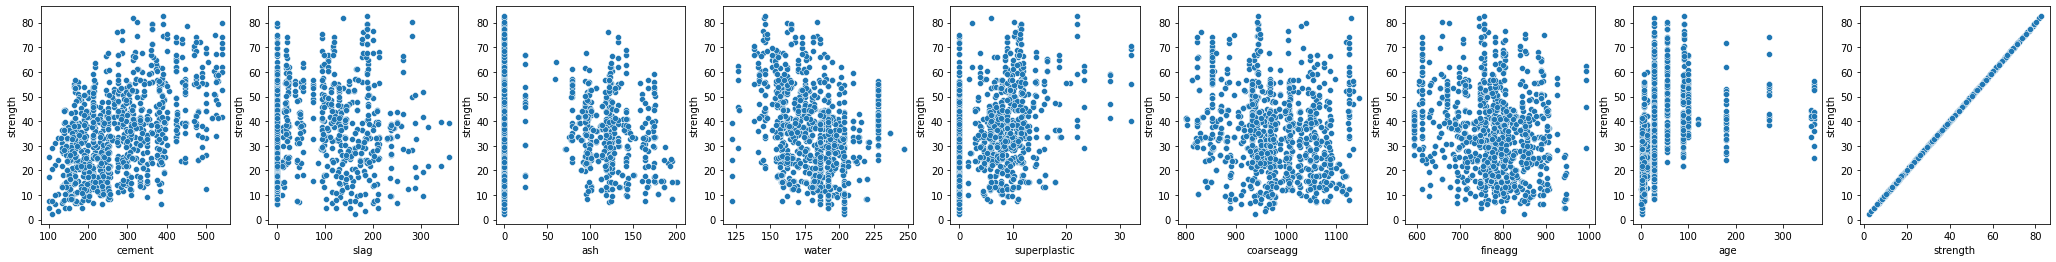

In [16]:
cols = concrete.columns[:9]
fig, axes = plt.subplots(1, len(cols), figsize=(4 * len(cols), 4))

for i, col in enumerate(cols):
  sns.scatterplot(x=concrete[col], y=concrete['strength'], ax=axes[i])